In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
import cv2

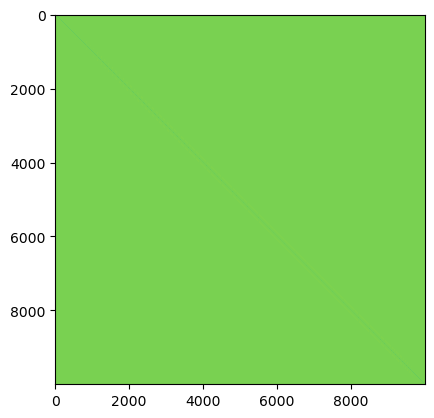

In [2]:
## Construct Laplace-Operator Matrix

# "Resolution"
width = 100
height = 100

def flatten_xy(x,y):
    return (y * width) + x

def unflatten_u(u):
    x = u % width
    y = u - (u // width)

    return (x,y)

def inregion(x,y):
    if x >= 0 and x < width and y >= 0 and y < height:

        # p-circle
        # p = 0.4
        # if np.abs((x-width/2)**p + (y-width/2)**p) < np.abs((width/2)**p):
        #     return True

        # heart shape
        a1 = 50; a2 = 45; b = 42
        if (((x - a1)/(b))**2 + ((y - a2)/(b))**2 - 1)**3 < ((x - a1)/(b))**2 * ((y - a2)/(b))**3:
            return True

        # full square
        # if True:
        #     return True

    return False

laplacian = np.zeros((width * height, width * height))

for yi in range(height):
    for xi in range(width):
        u = flatten_xy(xi, yi)
        if inregion(xi-1, yi):
            laplacian[u, flatten_xy(xi-1, yi)] = 1

        if inregion(xi+1, yi):
            laplacian[u, flatten_xy(xi+1, yi)] = 1

        if inregion(xi, yi-1):
            laplacian[u, flatten_xy(xi, yi-1)] = 1

        if inregion(xi, yi+1):
            laplacian[u, flatten_xy(xi, yi+1)] = 1

        laplacian[u, flatten_xy(xi, yi)] = -4

plt.imshow(laplacian)
plt.show()

In [3]:
# Find the eigenvectors and eigenvalues of the laplacian matrix
# There are width*height eigenvectors but only the ones referring to the smallest eigenvalues
# are meaningful, as the resolution is not high enough to capture the high-frequency details

eigensystem = np.linalg.eig(laplacian)

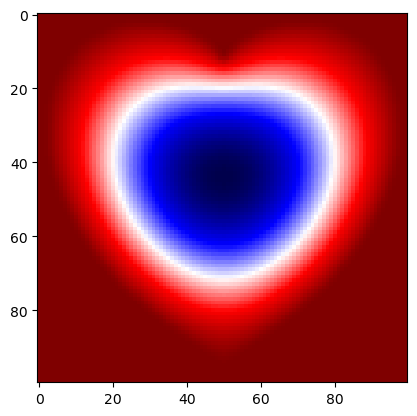

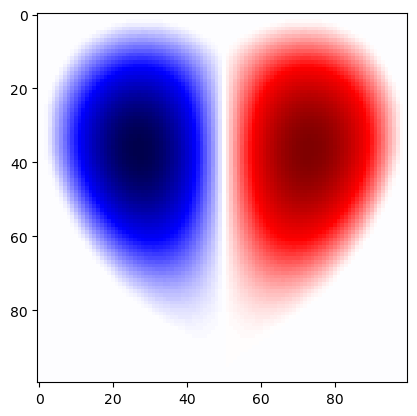

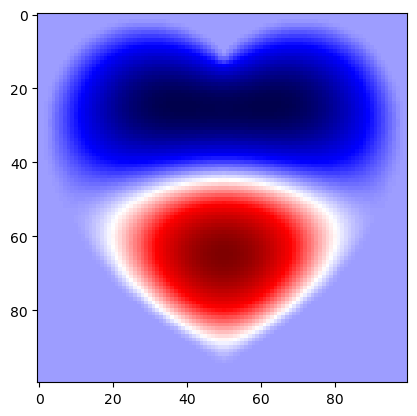

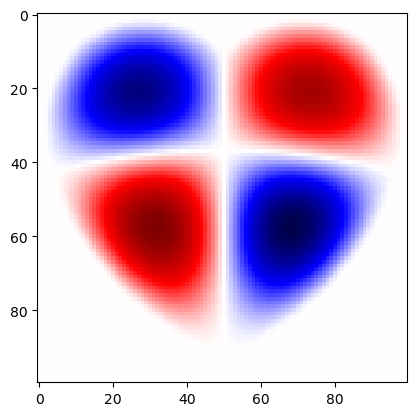

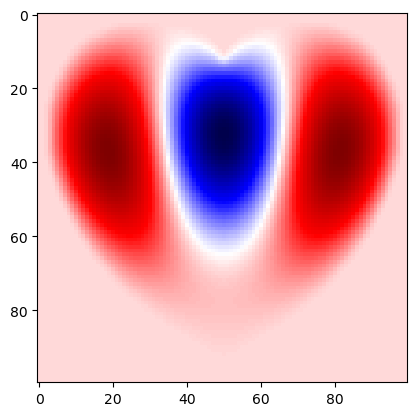

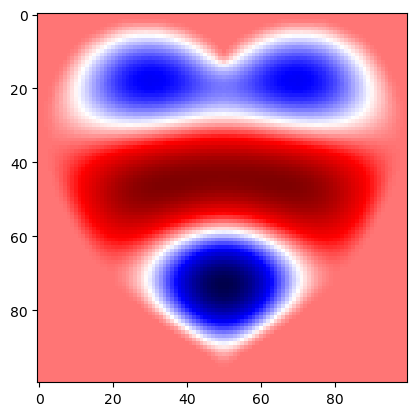

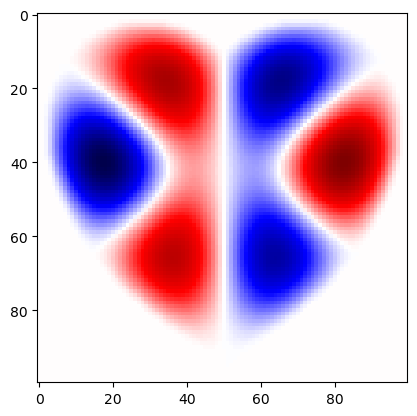

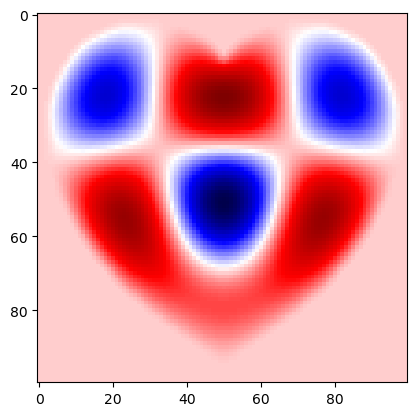

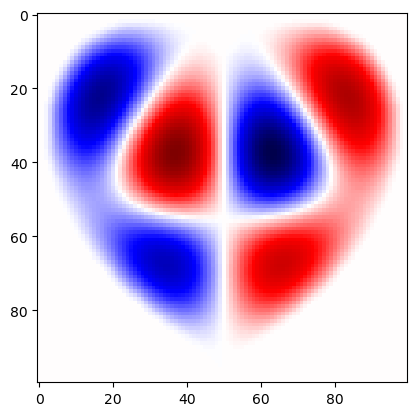

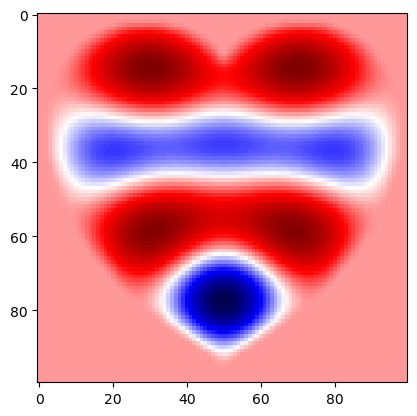

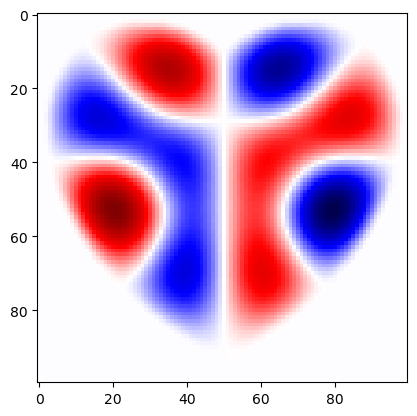

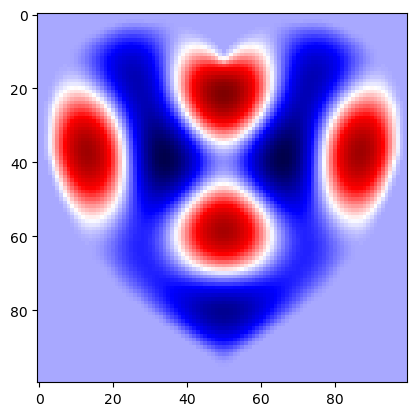

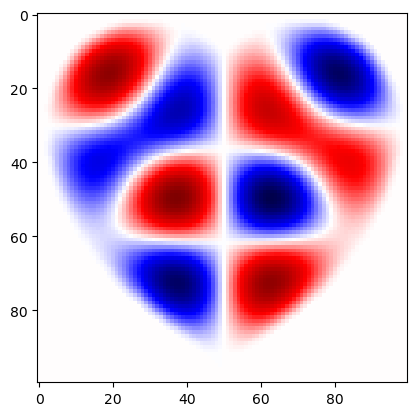

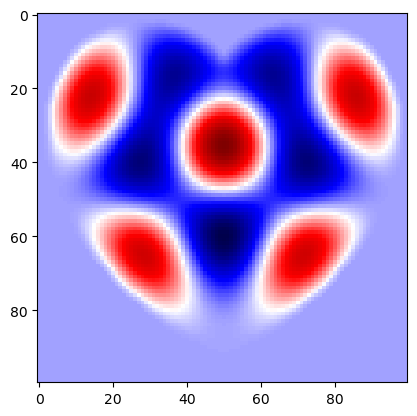

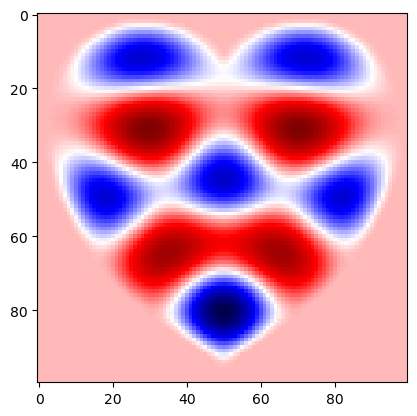

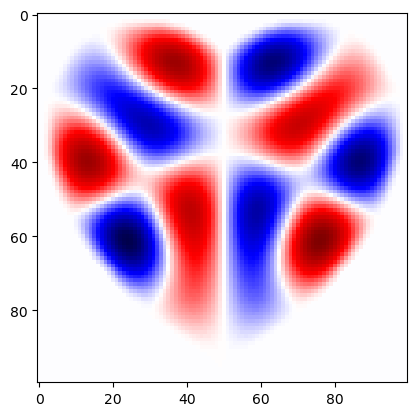

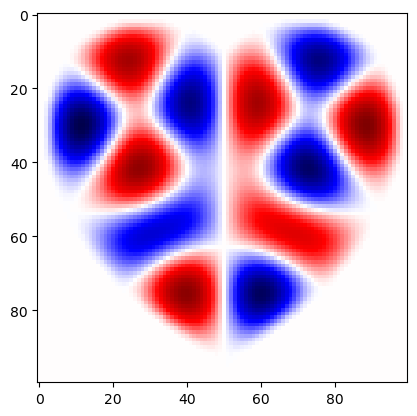

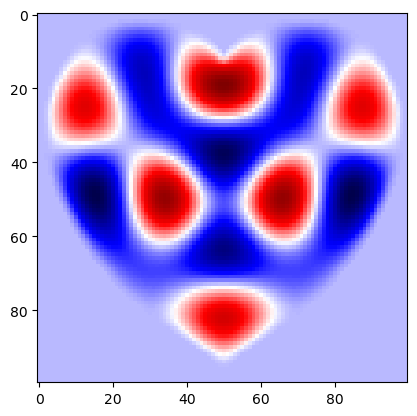

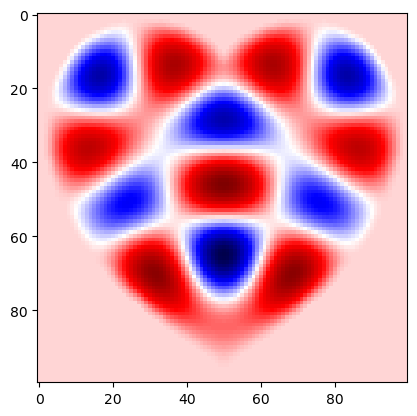

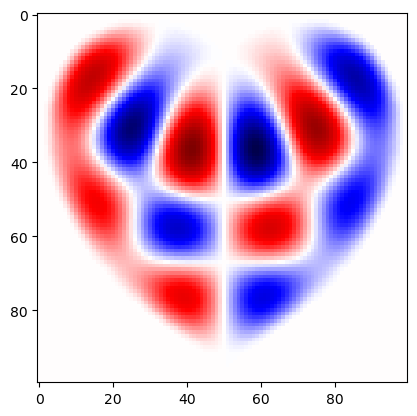

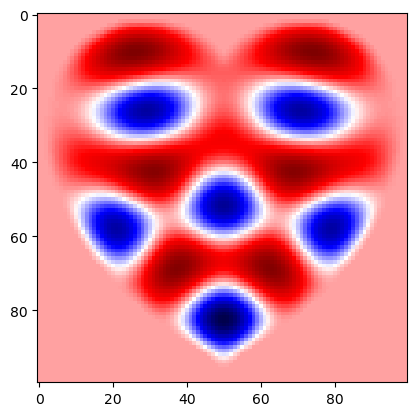

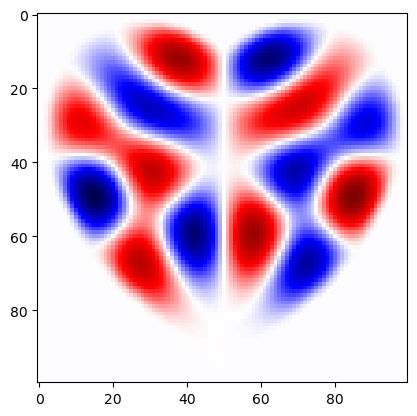

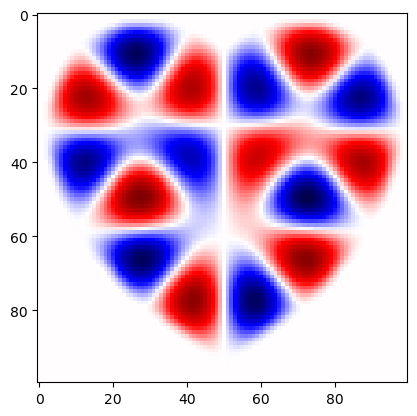

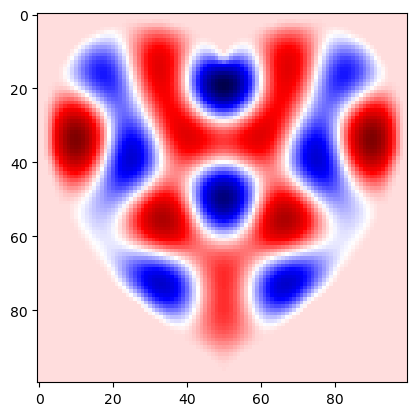

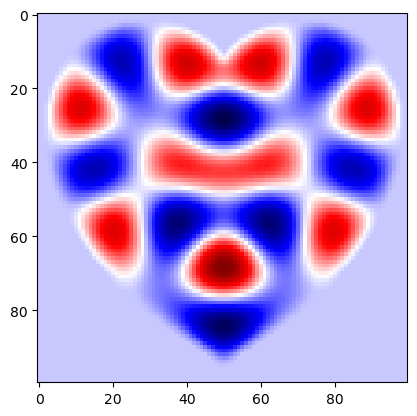

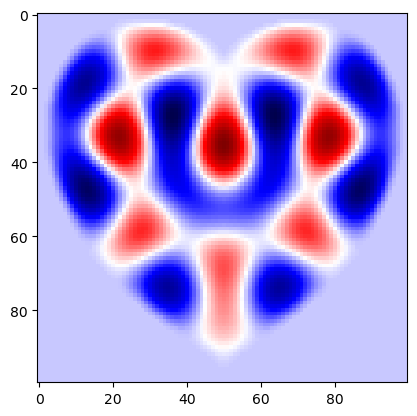

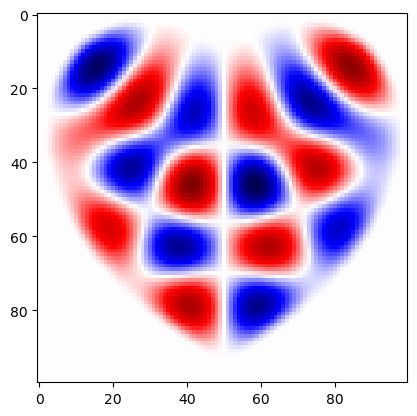

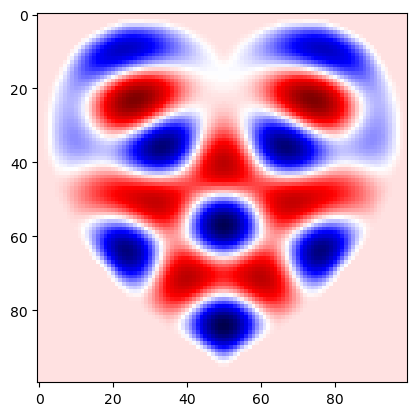

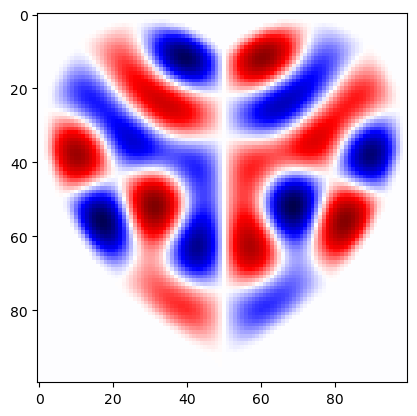

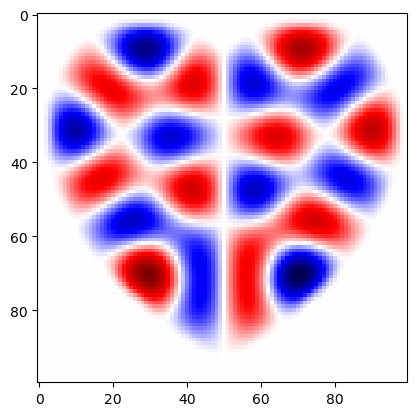

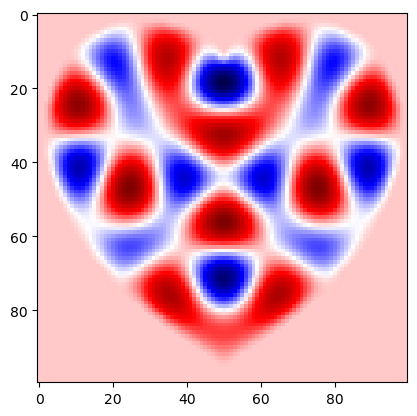

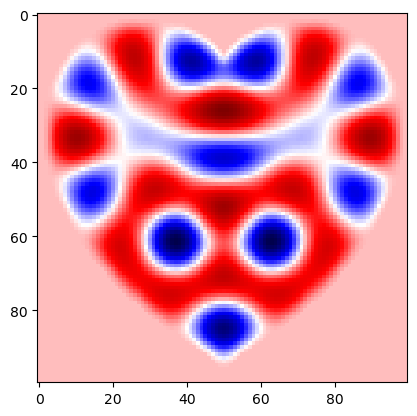

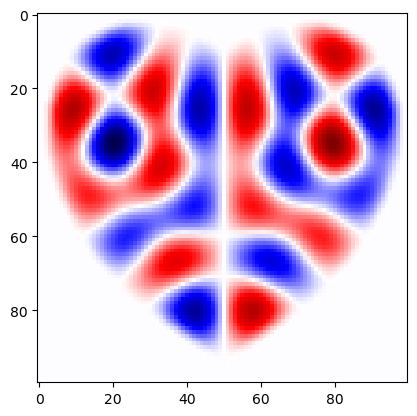

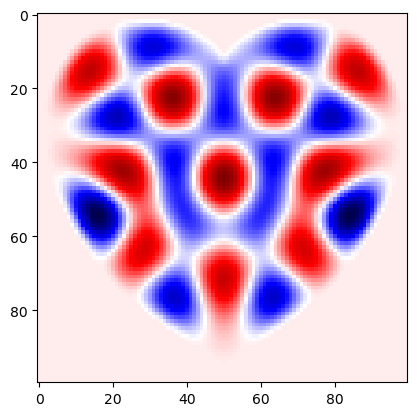

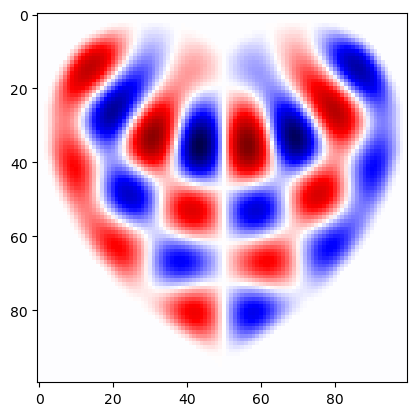

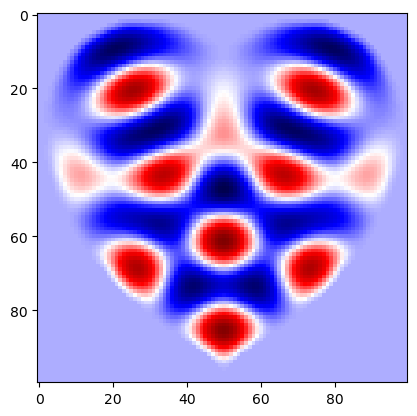

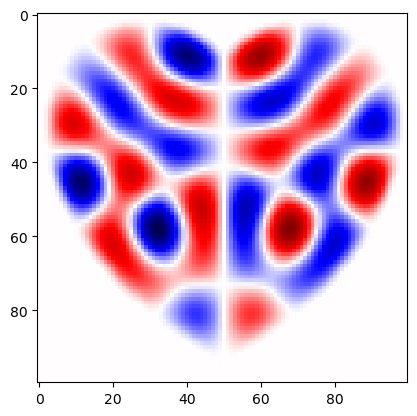

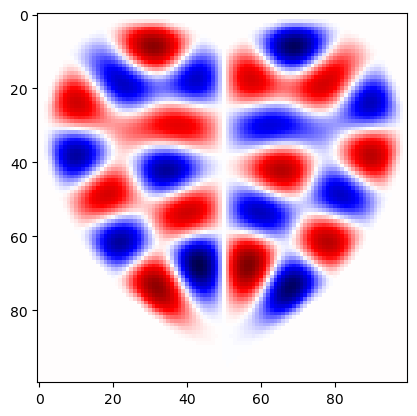

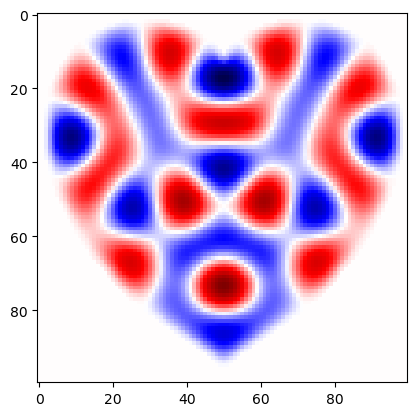

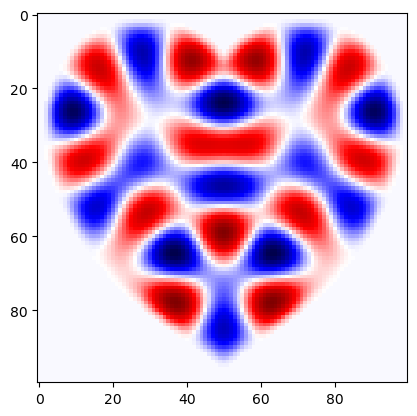

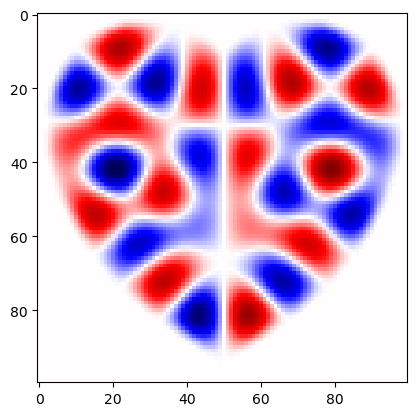

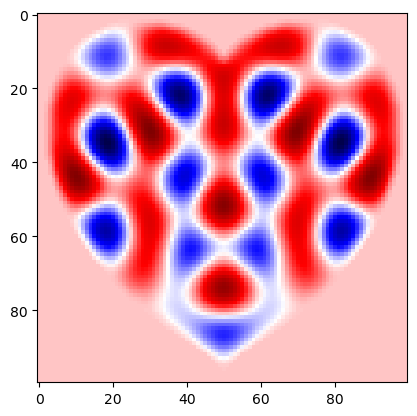

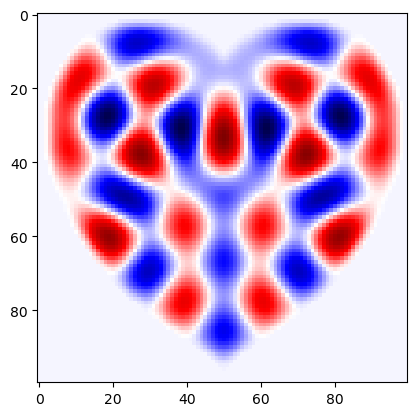

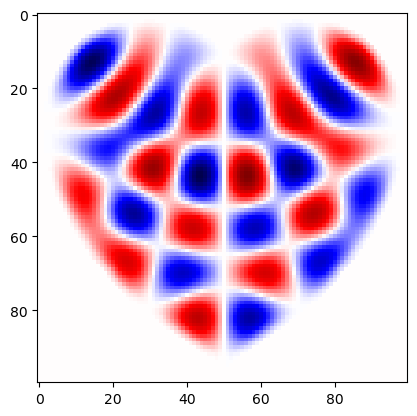

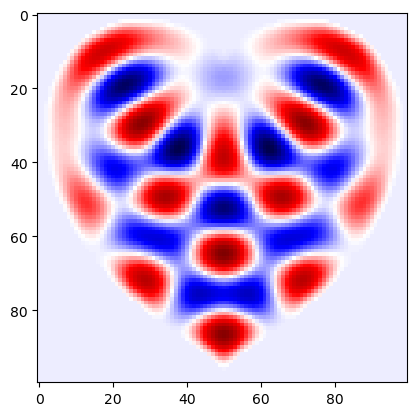

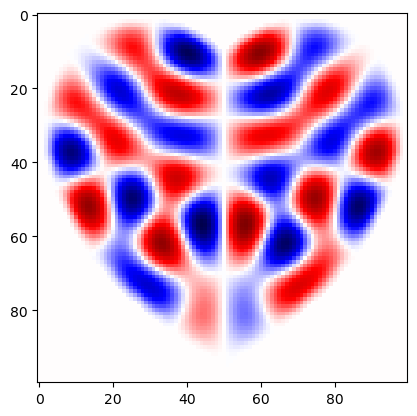

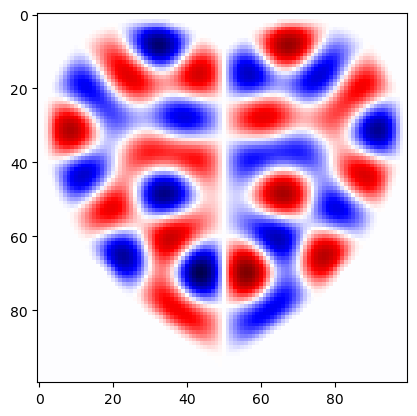

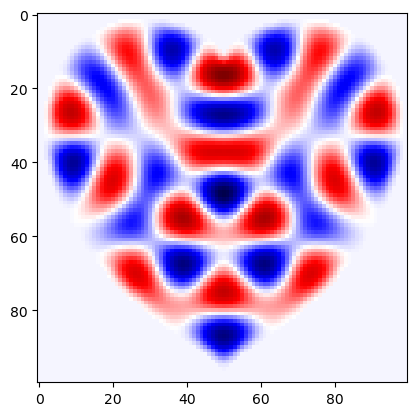

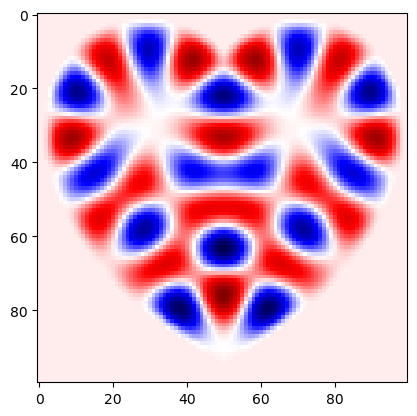

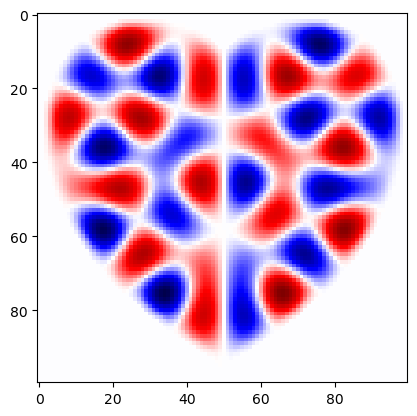

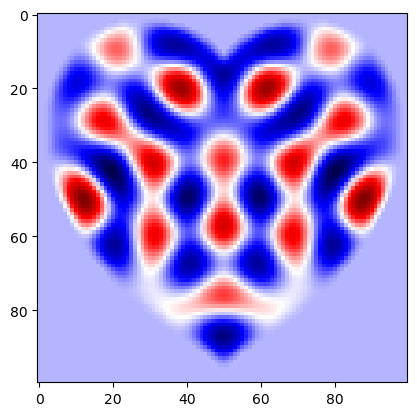

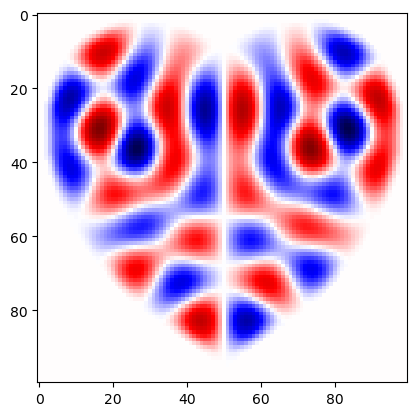

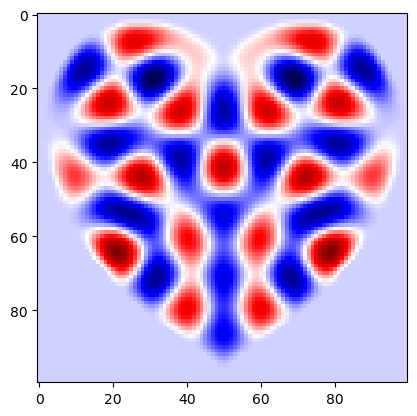

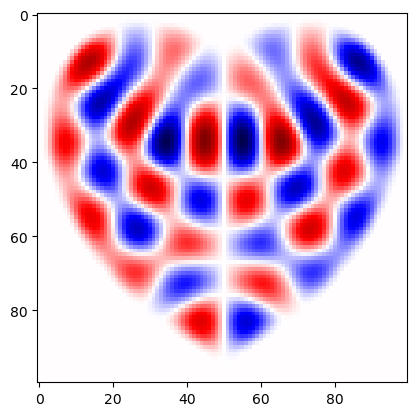

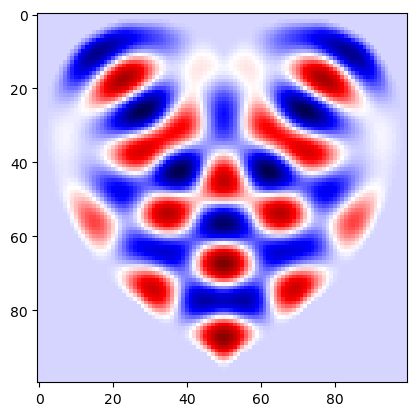

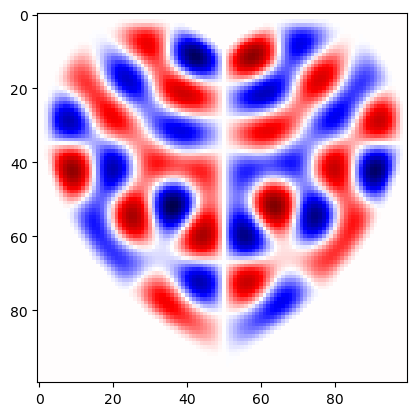

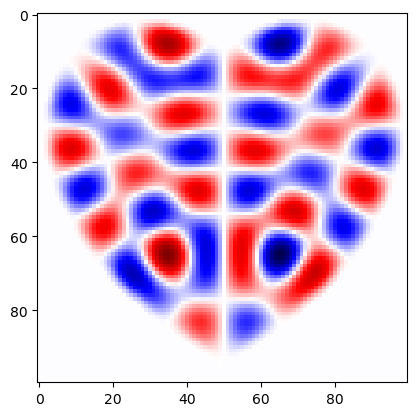

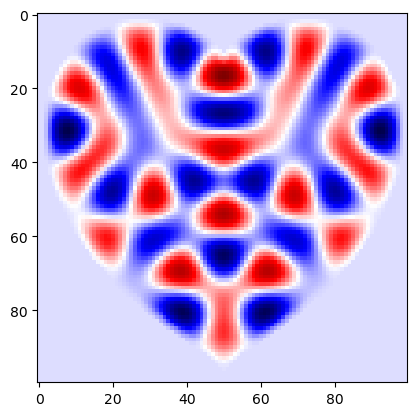

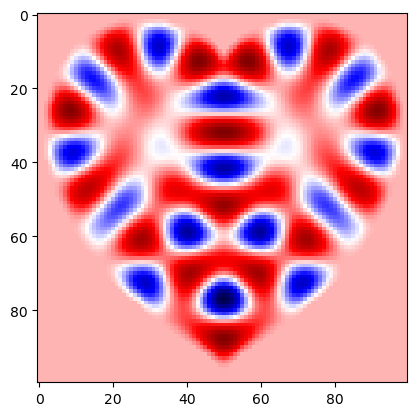

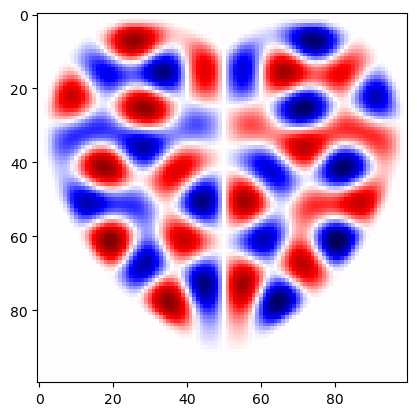

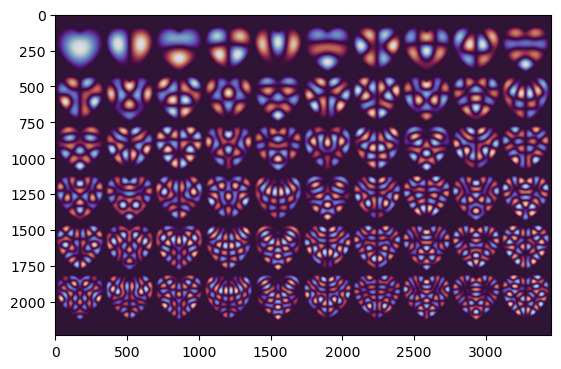

In [7]:
eigenvalues, eigenvectors = eigensystem
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# a colormap
cmap = plt.cm.twilight

wall = np.ones((2234, 3456, 3), dtype=np.uint8) * 255
wall[:,:] = np.array(cmap(0.5)[:3])*255

for i in range(0,60):
    data = eigenvectors[:, i]
    data = np.real(np.resize(data, (height,width)))[::-1]

    plt.imshow( data, cmap="seismic" )
    plt.show()

    data = cv2.resize(data, (345, 345))
    image = cmap( data/np.max(np.abs(data)*2) + 0.5 )

    frame = (255*image[:,:,:3]).astype(np.uint8)
    wall_y = (i*345) // 3450 * 345

    wall_x = (i*345) % 3450

    wall[80 + wall_y:80 + wall_y+345, wall_x:wall_x+345] = frame


plt.imshow(wall)
plt.imsave('./heart_background_twilight.png', wall)